<a href="https://colab.research.google.com/github/thomaziogiacobbe/cnc/blob/main/equacoesAlgebricasETranscendentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Executar todas as 82 celulas contidas na celula abaixo para obter todos os resultados

# **Resolução Numérica de Equações Algebricas e Transcendentes**

## **Imports, validação do intervalo e funções f1 e f2**

In [ ]:
import math
import sympy
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable, Tuple, List, Optional
import time

In [ ]:
f1 = lambda x : x**3 - 9*x + 5
f2 = lambda x : 2*(x**3) + 5*(x**2) - 8*x - 10

In [ ]:
def validaIntervalo(func: Callable, a: float, b: float) -> bool:
  if func(a) * func(b) >= 0:
    print("intervalo invalido")
    return False

  return True

## **Metodo Bissecção e Falsa Posição**

In [ ]:
def metodoBisseccao(func: Callable, a: float, b: float, precisao: float) -> Tuple[Optional[float], int, List[float]]:

  if validaIntervalo(func, a, b):
    m = func(a)

    k = 1
    iterValues = []
    while True:
      x = (a + b) / 2

      fx = func(x)
      iterValues.append(fx)
      if abs(fx) < precisao:
        return (x, k, iterValues)

      if m * fx > 0:
        a = x
      else:
        b = x

      k = k + 1
  else:
    return (None, 0, [])

In [ ]:
def metodoFalsaPosicao(func: Callable, a: float, b: float, precisao: float) -> Tuple[Optional[float], int, List[float]]:
  if validaIntervalo(func, a, b):
    m = func(a)

    k = 1
    iterValues = []
    while True:
      x = ((a * func(b)) - (b * func(a))) / (func(b) - func(a))

      fx = func(x)
      iterValues.append(fx)
      if abs(fx) < precisao:
        return (x, k, iterValues)

      if m * fx > 0:
        a = x
      else:
        b = x

      k = k + 1
  else:
    return (None, 0, [])

In [ ]:
#print(metodoBisseccao(f1, 0.5, 1, 0.01))
#print(metodoFalsaPosicao(f1, 0, 1, 0.0005))
#print(metodoFalsaPosicao(f2, 0, 3, 0.05))

## **Metodo Newton-Rhapson e da Secante**

In [ ]:
fl = lambda x: (x**3) - 9*x + 3

x = sympy.Symbol('x')
f3 = (x**3) - 9*x + 3

df = f3.diff(x)
dfl = sympy.lambdify(x, df)

fs = lambda x: (x**2) + x - 6

In [ ]:
def metodoNewtonRhapson(func: Callable, df: Callable, x0: float, precisao: float) -> Tuple[Optional[float], int, List[float]]:

  iterValues = []

  if abs(func(x0)) < precisao:
    return (x0, 0, [x0])

  k = 1
  while True:
    x1 = x0 - (func(x0) / df(x0))
    iterValues.append(x1)
    if abs(func(x1)) < precisao or abs(x1 - x0) < precisao:
      return (x1, k, iterValues)

    x0 = x1

    k = k + 1

In [ ]:
def metodoSecante(func: Callable, x0: float, x1: float, precisao: float) -> Tuple[Optional[float], int, List[float]]:

  iterValues = []

  if abs(func(x0)) < precisao:
    return (x0, 0, [x0])
  elif abs(func(x1)) < precisao or abs(x1 - x0) < precisao:
    return (x1, 0, [x1])

  k = 1
  while True:
    fx1 = func(x1)
    x = x1 - ((fx1) / (fx1 - func(x0))) * (x1 - x0)
    iterValues.append(x)
    if abs(func(x)) < precisao or abs(x - x1) < precisao:
      return (x, k, iterValues)

    x0 = x1
    x1 = x

    k = k + 1

In [ ]:
#print(metodoNewtonRhapson(fl, dfl, 0.75, 0.01))
#print(metodoSecante(fs, 1.5, 1.7, 0.01))

## **Plotagem de gráfico e definição de uma função para plotagem**

In [ ]:
inicio = -10
fim = 10
nro_de_pontos = 100

In [ ]:
curva = np.linspace(inicio, fim, nro_de_pontos)
valores = [f1(valor) for valor in curva]

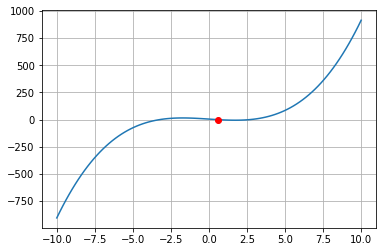

In [ ]:
raiz, n_iter, iter_values = metodoFalsaPosicao(f1, 0, 1, 0.0005)

plt.plot(curva, valores, linestyle="-")
plt.plot(raiz,[0],'ro')
plt.grid()
plt.show()

In [ ]:
def plotGrafico(inicio: float, fim: float, nro_de_pontos: int, funcao: Callable, raiz: Optional[float] = None) -> None:
  curva = np.linspace(inicio, fim, nro_de_pontos)
  valores = [funcao(valor) for valor in curva]

  plt.plot(curva, valores, linestyle="-")

  if raiz != None:
    plt.plot(raiz,[0],'ro')

  plt.grid()
  plt.show()

## **Relatório**

### Ex 1

In [ ]:
m = 0.5
e = 0.2
eq_kepler = lambda x: x - e*math.sin(x) - m

In [ ]:
raiz, _, _ = metodoBisseccao(eq_kepler, 0, 2, 10**-3)
print(raiz)

0.615234375


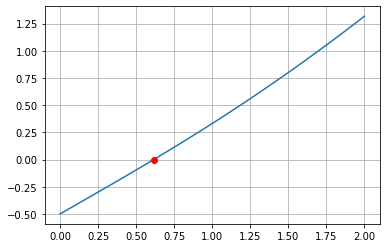

In [ ]:
plotGrafico(0, 2, 100, eq_kepler, raiz)

### Ex 2

In [ ]:
c5 = 1000
c1 = -3
c0 = 9.04
eq_fluxo = lambda d: c5*(d**5) + c1*d + c0

In [ ]:
d = sympy.Symbol('d')
f = c5*(d**5) + c1*d + c0

df = f.diff(d)
df_fluxo = sympy.lambdify(d, df)

In [ ]:
raiz, _, _ = metodoNewtonRhapson(eq_fluxo, df_fluxo, -0.5, 10**-3)
print(raiz)

-0.4000000658024373


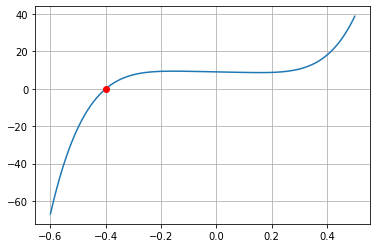

In [ ]:
plotGrafico(-0.6, 0.5, 100, eq_fluxo, raiz)

### Ex 3

In [ ]:
c = 4
eq_oxigenio = lambda x: 10 - 15*(math.exp(-0.1*x) - math.exp(-0.5*x)) - c

In [ ]:
raiz, _, _ = metodoBisseccao(eq_oxigenio, 0, 5, 10**-3)

print(raiz)

1.57958984375


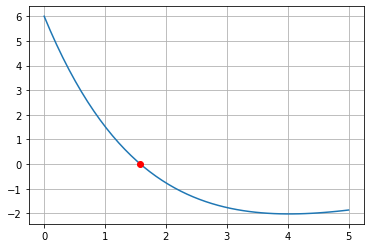

In [ ]:
plotGrafico(0, 5, 50, eq_oxigenio, raiz)

### Ex 4

In [ ]:
f = lambda x: 2*(x**4) + 4*(x**3) + 3*(x**2) - 10*x - 15

#### a

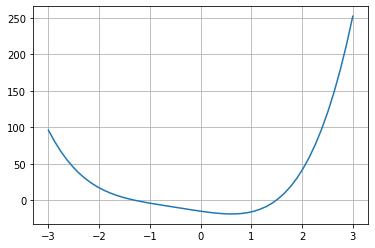

In [ ]:
plotGrafico(-3, 3, 50, f)

#### b

In [ ]:
raiz, n_iter, _ = metodoBisseccao(f, 0, 3, 10**-10)
print('Raiz: {}, total iteracoes: {}'.format(raiz, n_iter))

Raiz: 1.492878708664648, total iteracoes: 38


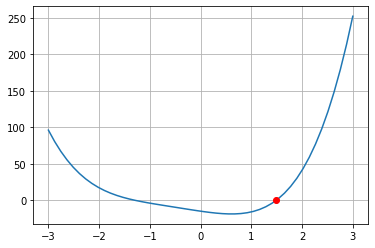

In [ ]:
plotGrafico(-3, 3, 50, f, raiz)

#### c

In [ ]:
raiz, n_iter, _ = metodoFalsaPosicao(f, 0, 3, 10**-10)
print('Raiz: {}, total iteracoes: {}'.format(raiz, n_iter))

Raiz: 1.492878708662261, total iteracoes: 78


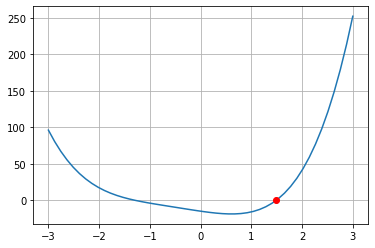

In [ ]:
plotGrafico(-3, 3, 50, f, raiz)

#### d

In [ ]:
x = sympy.Symbol('x')
exp = 2*(x**4) + 4*(x**3) + 3*(x**2) - 10*x - 15
df = exp.diff(x)
df = sympy.lambdify(x, df)

In [ ]:
raiz, n_iter, _ = metodoNewtonRhapson(f, df, 3, 10**-10)
print('Raiz: {}, total iteracoes: {}'.format(raiz, n_iter))

Raiz: 1.4928787086636037, total iteracoes: 7


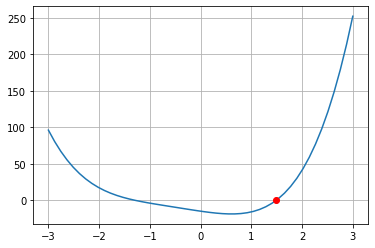

In [ ]:
plotGrafico(-3, 3, 50, f, raiz)

#### e

In [ ]:
raiz, n_iter, _ = metodoSecante(f, 0, 3, 10**-10)
print('Raiz: {}, total iteracoes: {}'.format(raiz, n_iter))

Raiz: -1.3003841326429082, total iteracoes: 10


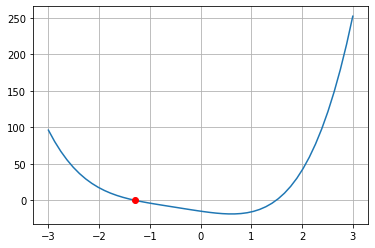

In [ ]:
plotGrafico(-3, 3, 50, f, raiz)

#### f

É possivel ver resultados bem parecidos, exceto no metodo da secante em que o resultado foi diferente, embora diferente esse resultado ainda sim é uma das raizes dessa função.

É possível ver no exercício B que embora o numero de iterações seja alto (38) o tempo de execução foi bem rápido, próximo ao metodo de newthon-rhapson sem calcular a derivada e o metodo da secante

#####Benchmarks

In [ ]:
n_runs = 1000

In [ ]:
timers = 0

#benchmark metodo bisseccao
for i in range(n_runs):
  start = time.perf_counter()
  metodoBisseccao(f, 0, 3, 10**-10)
  timers += (time.perf_counter() - start)

media = timers / n_runs

print("{:.10f}".format(media))

0.0000678722


In [ ]:
timers = 0

#benchmark metodo falsa posicao
for i in range(n_runs):
  start = time.perf_counter()
  metodoFalsaPosicao(f, 0, 3, 10**-10)
  timers += (time.perf_counter() - start)

media = timers / n_runs

print("{:.10f}".format(media))

0.0005179074


In [ ]:
timers = 0

#benchmark metodo newthon-rhapson
for i in range(n_runs):
  start = time.perf_counter()
  x = sympy.Symbol('x')
  exp = 2*(x**4) + 4*(x**3) + 3*(x**2) - 10*x - 15
  df = exp.diff(x)
  df = sympy.lambdify(x, df)
  metodoNewtonRhapson(f, df, 3, 10**-10)
  timers += (time.perf_counter() - start)

mediaCalculandoDerivada = timers / n_runs

timers = 0

#sem calcular a derivada
x = sympy.Symbol('x')
exp = 2*(x**4) + 4*(x**3) + 3*(x**2) - 10*x - 15
df = exp.diff(x)
df = sympy.lambdify(x, df)

for i in range(n_runs):
  start = time.perf_counter()
  metodoNewtonRhapson(f, df, 3, 10**-10)
  timers += (time.perf_counter() - start)

mediaSemCalcularDerivada = timers / n_runs

print("Média calculando derivada: {:.10f} \nMédia sem calcular a derivada: {:.10f}".format(mediaCalculandoDerivada, mediaSemCalcularDerivada))

Média calculando derivada: 0.0034465992 
Média sem calcular a derivada: 0.0000435935


In [ ]:
timers = 0

#benchmark metodo secante
for i in range(n_runs):
  start = time.perf_counter()
  metodoSecante(f, 0, 3, 10**-10)
  timers += (time.perf_counter() - start)

media = timers / n_runs

print("{:.10f}".format(media))

0.0000809566


### Ex 5

In [ ]:
f = lambda x: math.sin(x) * x + 4

#### a

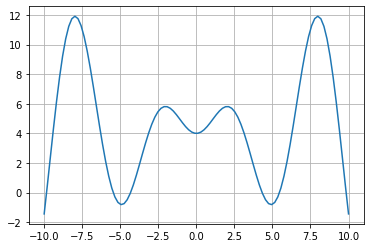

In [ ]:
plotGrafico(-10, 10, 100, f)

#### b

In [ ]:
raiz, n_iter, _ = metodoBisseccao(f, 1, 5, 10**-10)
print('Raiz: {}, total iteracoes: {}'.format(raiz, n_iter))

Raiz: 4.323239543708041, total iteracoes: 34


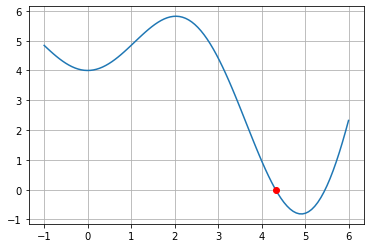

In [ ]:
plotGrafico(-1, 6, 100, f, raiz)

#### c

In [ ]:
raiz, n_iter, _ = metodoFalsaPosicao(f, 1, 5, 10**-10)
print('Raiz: {}, total iteracoes: {}'.format(raiz, n_iter))

Raiz: 4.323239543733132, total iteracoes: 9


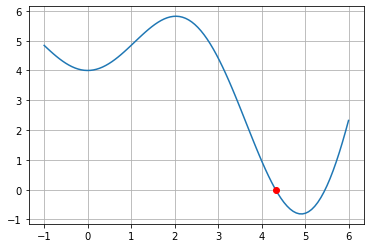

In [ ]:
plotGrafico(-1, 6, 100, f, raiz)

#### d

In [ ]:
x = sympy.Symbol('x')
exp = sympy.sin(x) * x + 4
df = exp.diff(x)
df = sympy.lambdify(x, df)

In [ ]:
raiz, n_iter, _ = metodoNewtonRhapson(f, df, 1, 10**-10)
print('Raiz: {}, total iteracoes: {}'.format(raiz, n_iter))

Raiz: -5.461308012589076, total iteracoes: 7


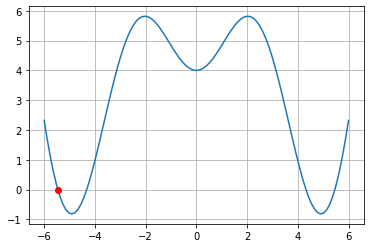

In [ ]:
plotGrafico(-6, 6, 100, f, raiz)

#### e

In [ ]:
raiz, n_iter, _ = metodoSecante(f, 1, 5, 10**-10)
print('Raiz: {}, total iteracoes: {}'.format(raiz, n_iter))

Raiz: 4.3232395437137425, total iteracoes: 7


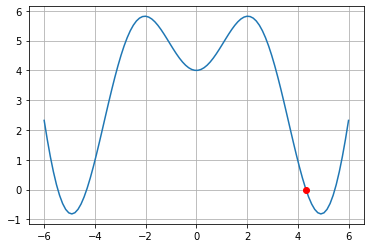

In [ ]:
plotGrafico(-6, 6, 100, f, raiz)

#### f

É possivel ver resultados bem parecidos, dessa vez a exceção foi no metodo de newthon-rhapson em que o resultado foi diferente, embora diferente esse resultado ainda sim é uma das raizes dessa função.

É possível ver novamente que no exercício B que embora o numero de iterações seja alto (38), o tempo de execução foi bem rápido, todos os resultados foram rápidos, com exceção do metodo de newthon-rhapson com o cálculo da derivada

#####Benchmarks

In [ ]:
n_runs = 1000

In [ ]:
timers = 0

#benchmark metodo bisseccao
for i in range(n_runs):
  start = time.perf_counter()
  metodoBisseccao(f, 1, 5, 10**-10)
  timers += (time.perf_counter() - start)

media = timers / n_runs

print("{:.10f}".format(media))

0.0000525469


In [ ]:
timers = 0

#benchmark metodo falsa posicao
for i in range(n_runs):
  start = time.perf_counter()
  metodoFalsaPosicao(f, 1, 5, 10**-10)
  timers += (time.perf_counter() - start)

media = timers / n_runs

print("{:.10f}".format(media))

0.0000554300


In [ ]:
timers = 0

#benchmark metodo newthon-rhapson calculando a derivada
for i in range(n_runs):
  start = time.perf_counter()
  x = sympy.Symbol('x')
  exp = sympy.sin(x) * x + 4
  df = exp.diff(x)
  df = sympy.lambdify(x, df)
  metodoNewtonRhapson(f, df, 1, 10**-10)
  timers += (time.perf_counter() - start)

mediaCalculandoDerivada = timers / n_runs


timers = 0

#sem calcular a derivada
x = sympy.Symbol('x')
exp = sympy.sin(x) * x + 4
df = exp.diff(x)
df = sympy.lambdify(x, df)

for i in range(n_runs):
  start = time.perf_counter()
  metodoNewtonRhapson(f, df, 1, 10**-10)
  timers += (time.perf_counter() - start)

mediaSemCalcularDerivada = timers / n_runs

print("Média calculando derivada: {:.10f} \nMédia sem calcular a derivada: {:.10f}".format(mediaCalculandoDerivada, mediaSemCalcularDerivada))

Média calculando derivada: 0.0017065904 
Média sem calcular a derivada: 0.0000444959


In [ ]:
timers = 0

#benchmark metodo secante
for i in range(n_runs):
  start = time.perf_counter()
  metodoSecante(f, 1, 5, 10**-10)
  timers += (time.perf_counter() - start)

media = timers / n_runs

print("{:.10f}".format(media))

0.0000228475
